# Aufgabe 5.1

Mit folgender Simulationsaufgabe sollen Sie mit dem Normalplot vertraut werden.

**a) Simulieren Sie n = 10, 20, 50 und 100 (standard-) normalverteilte Zufallszahlen und betrachten Sie die jeweilige Folge mit einem Normalplot.**

Wiederholen Sie diese Simulationen einige Male, bis Sie abschätzen können, wie weit zufällige Abweichungen von einer Geraden im Normalplot üblich sind.

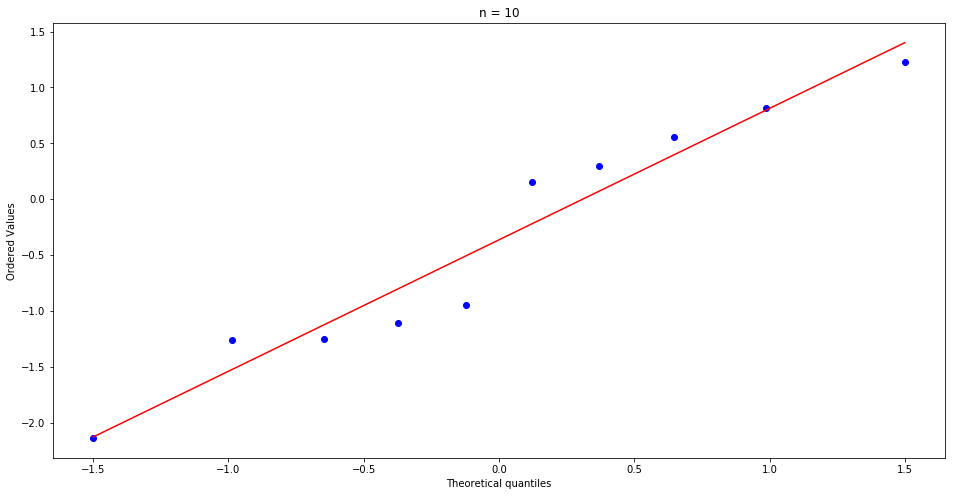

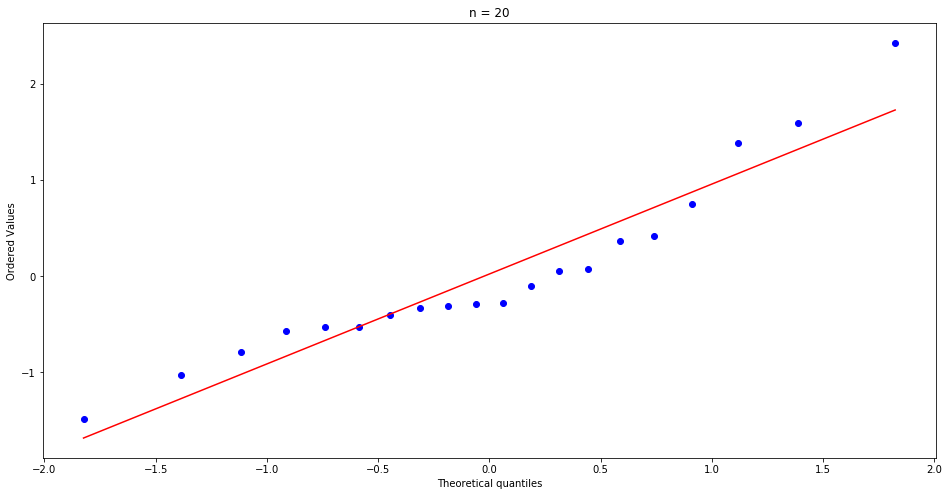

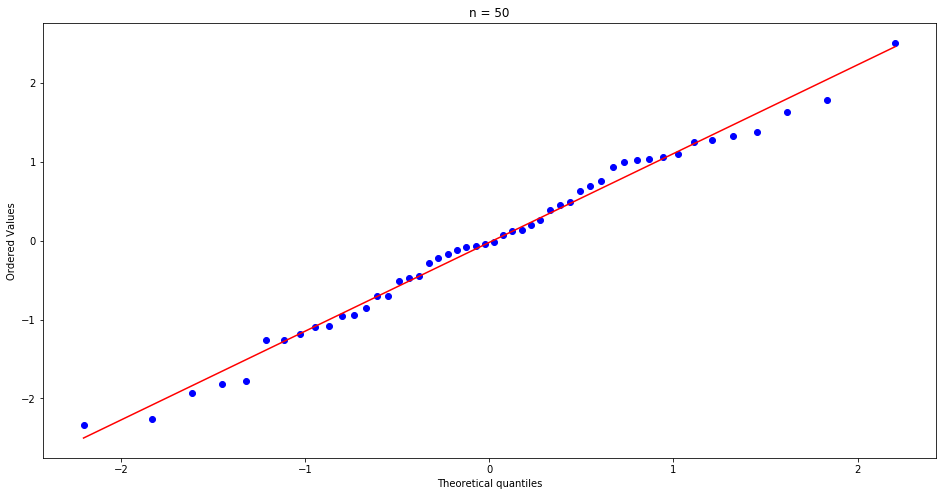

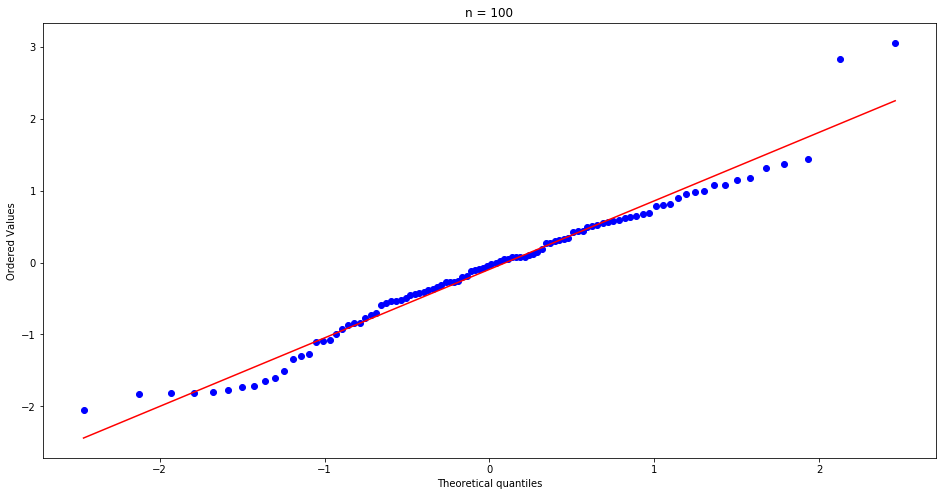

In [11]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import scipy.stats as st

matplotlib.rcParams['figure.figsize'] = [16, 8]

#for i in np.arange(1,9):
 #   x = st.norm.rvs(size=n)
  #  st.probplot(x,plot=plt.subplot(420+i))

for n in [10,20,50,100]:
    x = st.norm.rvs(size=n)
    st.probplot(x, plot=plt)
    plt.title("n = " + str(n))
    plt.show()

**b) _Langschwänzige Verteilung_: Simulieren Sie je $n = 20$ und $100$ t-verteilte Zufallszahlen mit $n = 20$, $7$ und $3$ Freiheitsgraden. Wiederholen Sie diese Simulationen einige Male, bis Sie abschätzen können, wie gross Abweichungen von einer Geraden im Normalplot üblich sind.**

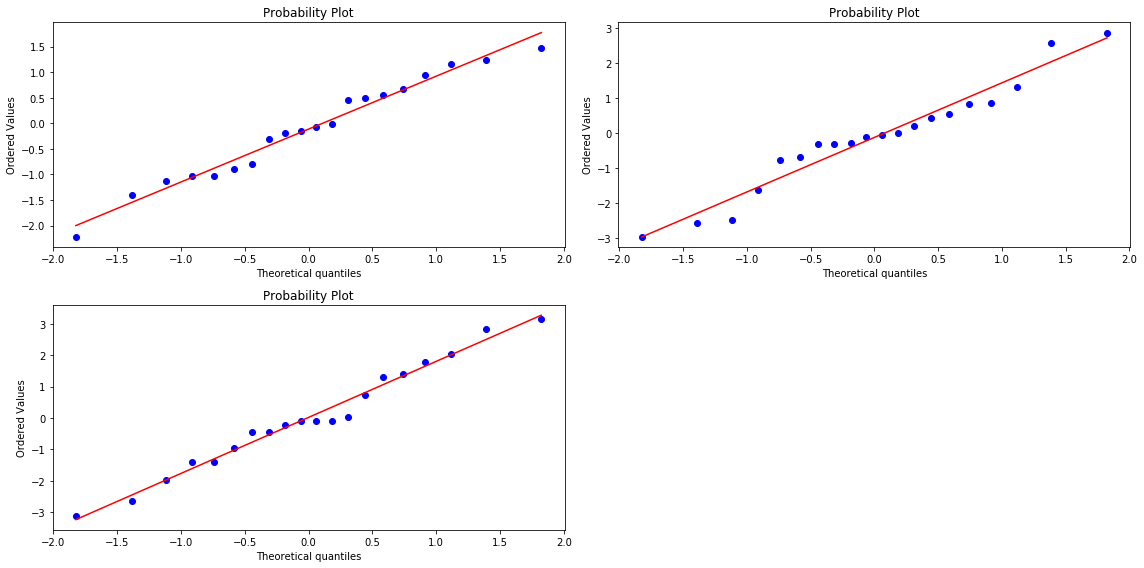

In [12]:
df = [20,7,3]
n = 20

for i,v in enumerate(df,start=1):
    x = st.t.rvs(size=n, df=v)
    st.probplot(x,plot=plt.subplot(220+i))

plt.tight_layout()
plt.show()

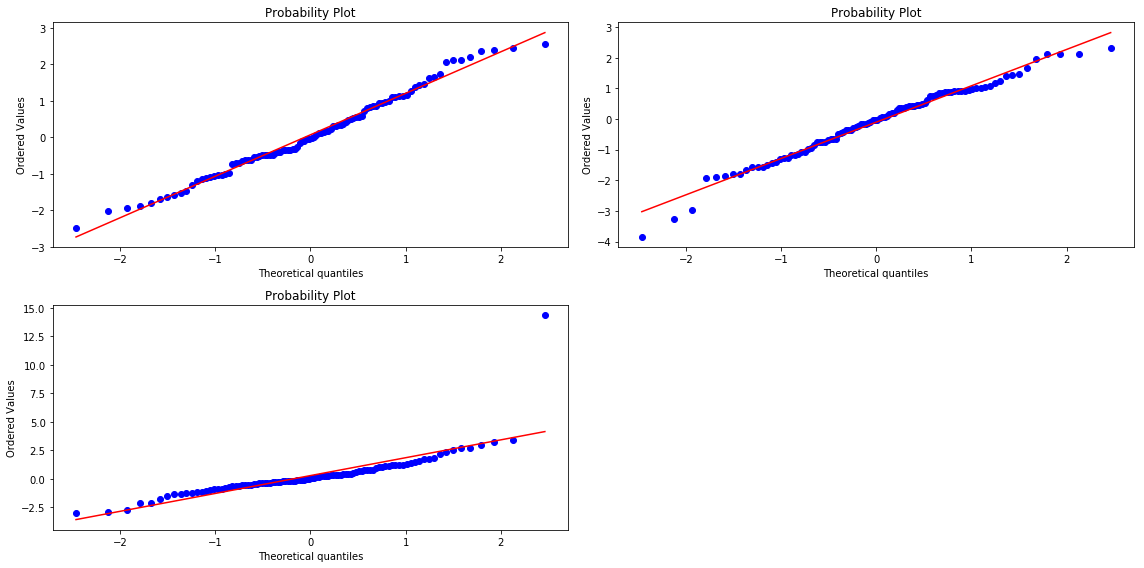

In [13]:
df = [20,7,3]
n = 100

for i,v in enumerate(df,start=1):
    x = st.t.rvs(size=n, df=v)
    st.probplot(x,plot=plt.subplot(220+i))

plt.tight_layout()
plt.show()

**_Schiefe Verteilung_: Simulieren Sie je $n = 20$ und $100$ chiquadrat-verteilte Zufallszahlen mit $v = 20$ und $1$ Freiheitsgraden. Wiederholen Sie diese Simulationen einige Male, bis Sie abschätzen können, wie gross Abweichungen von einer Geraden im Normalplot üblich sind.**

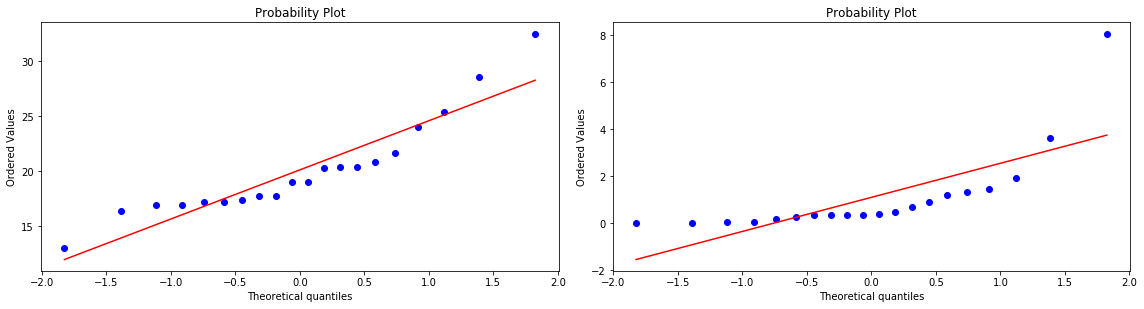

In [14]:
df = [20,1]
n = 20

for i,v in enumerate(df,start=1):
    x = st.chi2.rvs(size=n, df=v)
    st.probplot(x,plot=plt.subplot(220+i))
    
plt.tight_layout()
plt.show()

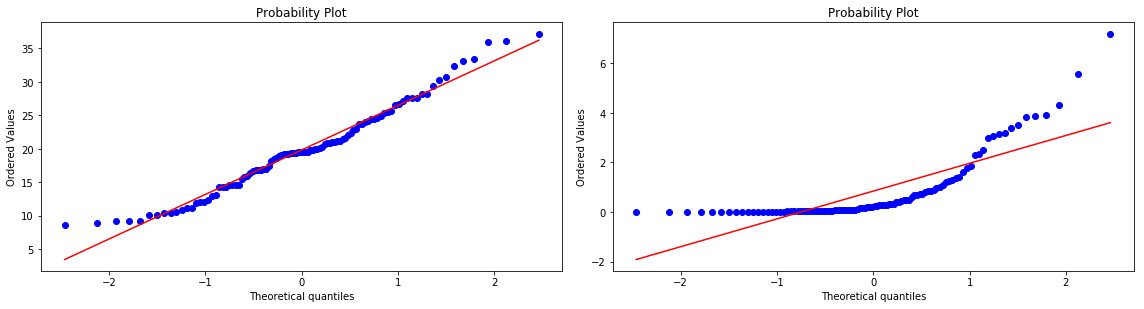

In [15]:
df = [20,1]
n = 100

for i,v in enumerate(df,start=1):
    x = st.chi2.rvs(size=n, df=v)
    st.probplot(x,plot=plt.subplot(220+i))
    
plt.tight_layout()
plt.show()

# Aufgabe 5.2

In dieser Aufgabe untersuchen Sie die Wirkung des Zentralen Grenzwertsatzes mittels Simulation. Gehen Sie von einer Zufallsvariablen $X$ aus, die folgendermassen verteilt ist: die Werte 0, 10 und 11 werden je mit einer Wahrscheinlichkeit $\frac{1}{3}$ angenommen.

Simulieren Sie nun die Verteilung von $X$ sowie die Verteilung des Mittelwerts $\overline{X}_n$ von mehreren $X$.

**a) Simulieren Sie $X$. Stellen Sie die Verteilung von $X$ mittels eines Histogramms von $1000$ Realisierungen von $X$ dar, und vergleichen Sie sie mittels des Normalplots mit der Normalverteilung.**

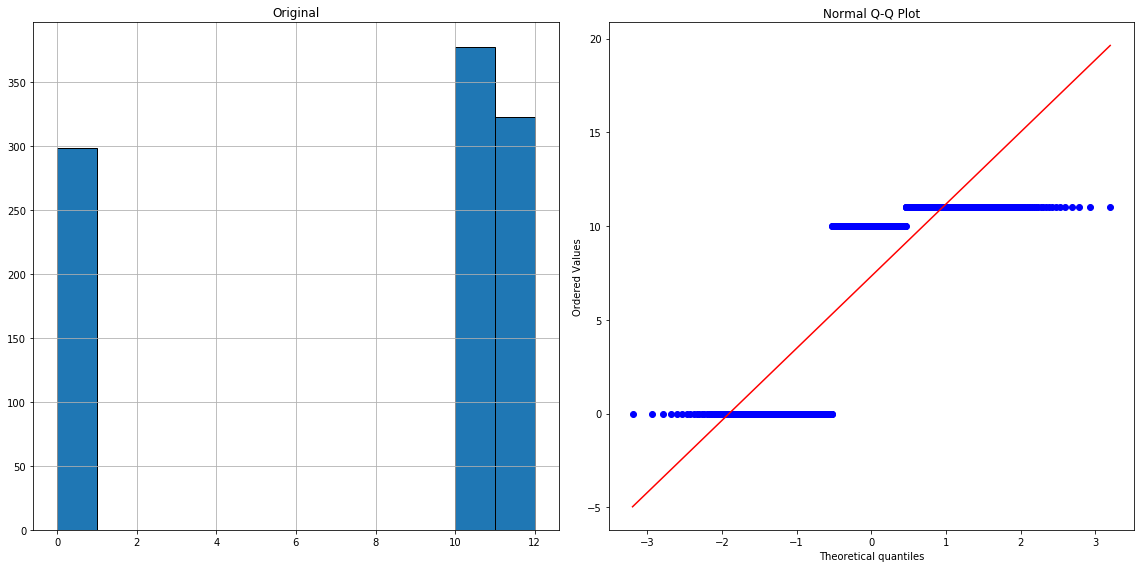

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from pandas import Series, DataFrame
import scipy.stats as st

werte = np.array([0,10,11])
sim = Series(np.random.choice(werte, size=1000, replace=True))


plt.subplot(121)
sim.hist(bins=[0,1,10,11,12],edgecolor="black")
plt.title("Original")

plt.subplot(122)
st.probplot(sim,plot=plt)
plt.title("Normal Q-Q Plot")

plt.tight_layout()
plt.show()

**b) Simulieren Sie nun $\overline{X}_5 = \frac{X_1+X_2+X_3+X_4+X_5}{5}$, wobei die $X_i$ die gleiche Verteilung haben wie $X$ und unabhängig sind. 
Stellen Sie die Verteilung von $\bar{X_5}$ anhand von $1000$ Realisierungen von $\bar{X_5}$ dar, und vergleichen Sie mit der Normalverteilung.**

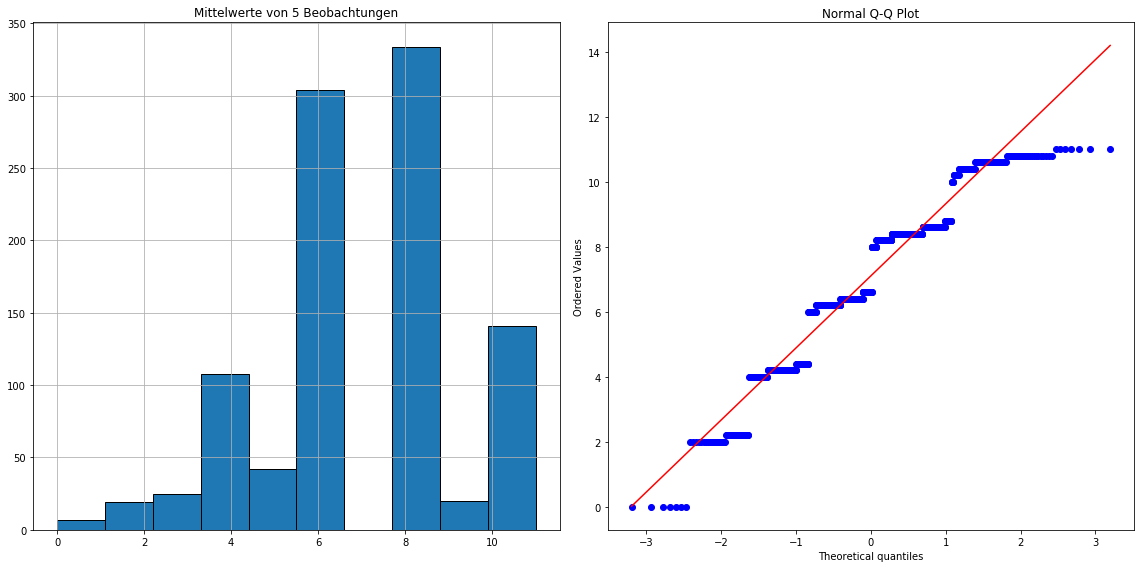

In [17]:
n = 5
sim = np.random.choice(werte, size=n*1000, replace=True)
sim = DataFrame(np.reshape(sim,(n,1000)))
sim_mean = sim.mean()


plt.subplot(1,2,1)
sim_mean.hist(edgecolor="black")
plt.title("Mittelwerte von 5 Beobachtungen")

plt.subplot(1,2,2)
st.probplot(sim_mean,plot=plt)
plt.title("Normal Q-Q Plot")

plt.tight_layout()
plt.show()

**c) Simulieren Sie nun die Verteilung von $\bar{X}_n$ auch für die Fälle, wo $\bar{X}_n$ das Mittel von $n = 10$ resp. $n = 200$ $X_i$ ist.**

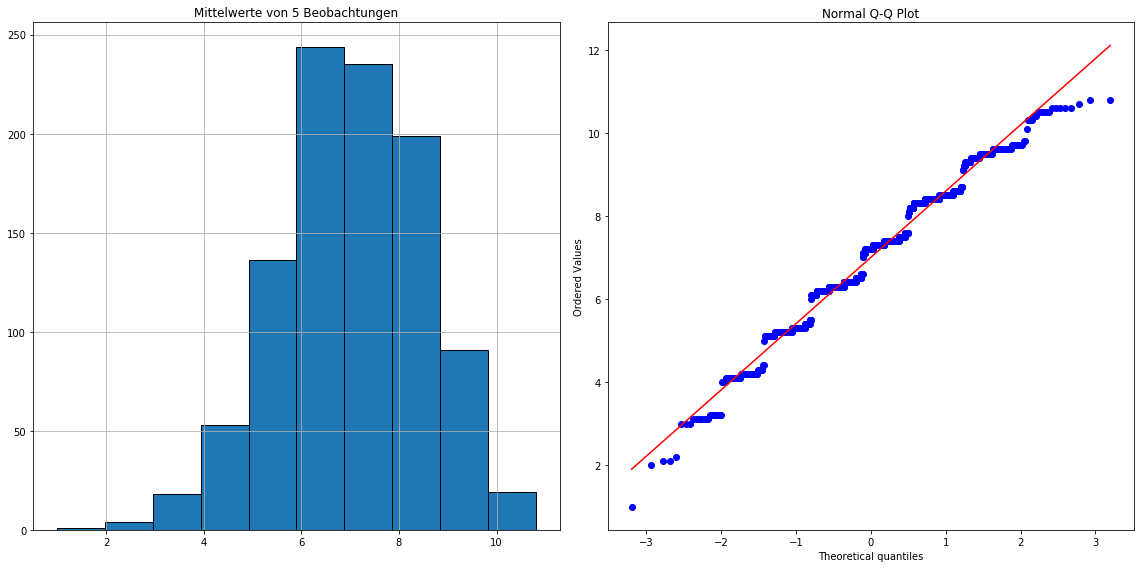

In [18]:
n = 10
sim = np.random.choice(werte, size=n*1000, replace=True)
sim = DataFrame(np.reshape(sim,(n,1000)))
sim_mean = sim.mean()


plt.subplot(1,2,1)
sim_mean.hist(edgecolor="black")
plt.title("Mittelwerte von 5 Beobachtungen")

plt.subplot(1,2,2)
st.probplot(sim_mean,plot=plt)
plt.title("Normal Q-Q Plot")

plt.tight_layout()
plt.show()

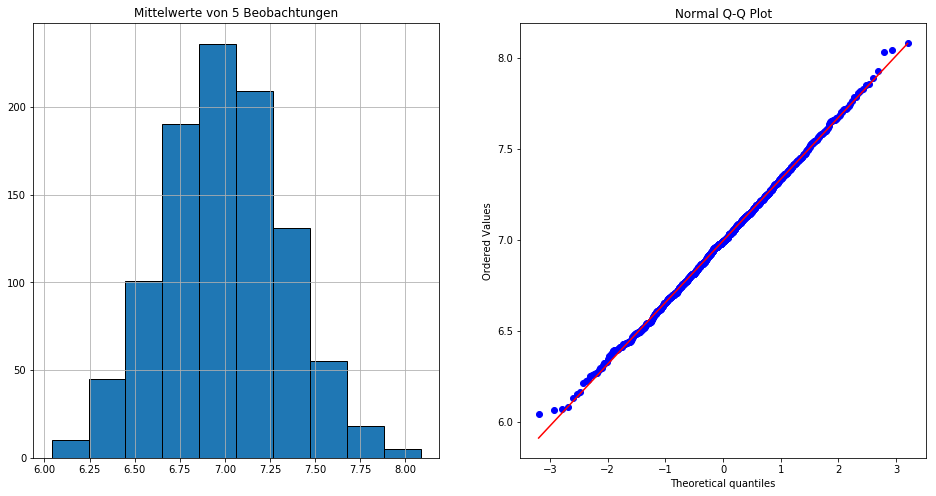

In [19]:
n = 200
sim = np.random.choice(werte, size=n*1000, replace=True)
sim = DataFrame(np.reshape(sim,(n,1000)))
sim_mean = sim.mean()


plt.subplot(1,2,1)
sim_mean.hist(edgecolor="black")
plt.title("Mittelwerte von 5 Beobachtungen")

plt.subplot(1,2,2)
st.probplot(sim_mean,plot=plt)
plt.title("Normal Q-Q Plot")

plt.show()

**d) Geben Sie die Verteilung von $\bar{X}_{200}$ an, zusammen mit den Werten der Verteilungsparameter.**

$X \sim \mathcal{N}(\mu,\,\sigma^{2})$

Für grosse $\bar{X}_n kann eine Normalverteilung angenommen werden.
Der Erwarungswert entspricht also dem Durchschnitt:

$$ \hat{\mu} = \widehat{E(X)} = \bar{x} = \frac{1}{n}E(U_i) = \frac{0 + 10 + 11}{3} = 7 $$

In [20]:
sim_mean.mean()

6.995105

Die Varianz ergibt sich aus:

$$ Var(\bar{X}_n) = \frac{1}{n^2}\sum_{i=1}^{n} Var(U_i) = \frac{1}{n}Var(U_i)$$

$$
Var(X)=\frac{1}{n} \sum_{i=1}^{n}(x_{i}-\mu)^{2}
$$

Für $n = 200$ und $\mu = 7$:

$$ Var(\bar{X}_n)= \frac{1}{200} \cdot \frac{(0-7)^2 + (10-7)^2 + (11-7)^2}{3} = \frac{24.67}{200} $$

In [21]:
((0-7)**2 + (10-7)**2 + (11-7)**2) / (3*200)


0.12333333333333334

# Aufgabe 5.3

In einer Studie wurde untersucht, wie bei Mäusen die Aufnahme von Eisen ($Fe^3+$) von der Dosis abhängt. Dazuwurden 54 Mäuse zufällig in 3 Gruppen zu je 18 Mäusen eingeteilt und jeweils mit Dosis hoch, mittel und tief gefüttert (hoch = 10.2millimolar, mittel=1.2 millimolar, tief=0.3 millimolar). Mittels radioaktiver Markierung wurde
der Anteil des zurückgehaltenen Eisens in Prozent nach einer gewissen Zeit bestimmt.

In [22]:
import pandas as pd

iron = pd.read_table("./data/ironF3.dat",sep=" ",index_col=False)

In [23]:
iron.describe()

,high,medium,low
count,18.000000,18.000000,18.00000
mean,3.698889,8.203889,11.75000
std,2.030870,5.447386,7.02815
min,0.710000,2.200000,2.25000
25%,2.420000,4.320000,6.10250
50%,3.475000,5.965000,9.98000
75%,4.472500,11.182500,15.99750
max,8.240000,18.590000,29.13000


**a) Erstellen Sie für jede der 3 Versuchsbedingungen einen Boxplot, am besten gerade nebeneinander. Wie unterscheiden sich die Daten der verschiedenen Versuchsbedingungen?**

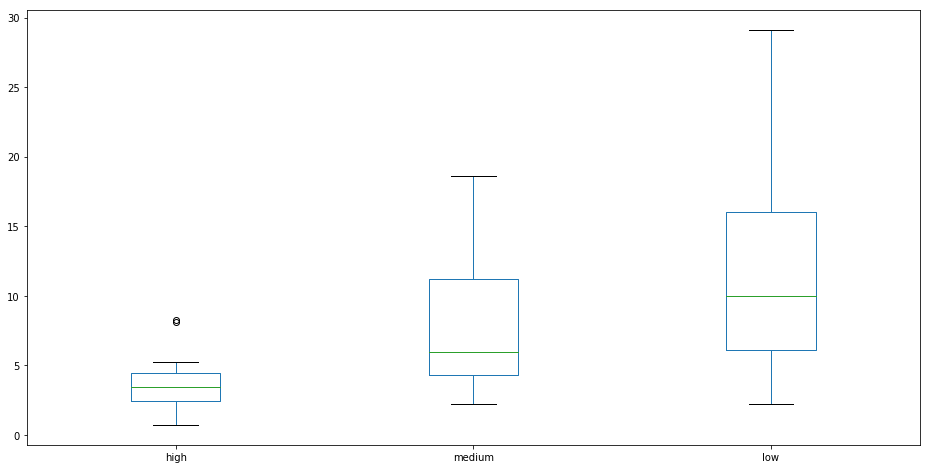

In [24]:
import matplotlib.pyplot as plt

iron.plot(kind="box")

**b) Transformieren Sie alle Wert emit dem Logarithmus und erstellen Sie wieder die 3 Boxplots wie bei Aufgabe a). Was hat sich durch die Transformation geändert?**

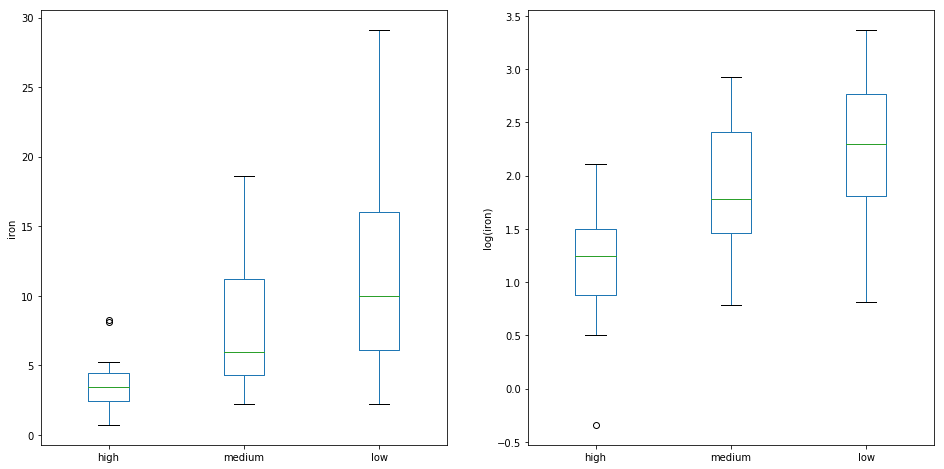

In [27]:
iron_log = np.log(iron)

plt.subplot(121)
iron.plot(kind="box", ax=plt.gca())
plt.ylabel("iron")

plt.subplot(122)
iron_log.plot(kind="box", ax=plt.gca())
plt.ylabel("log(iron)")

plt.show()

**c) Erstellen Sie einen Normalplot der Daten bei mittlerer Dosis vor und nach dem Logarithmieren. Wann passt die Normalverteilung besser?**

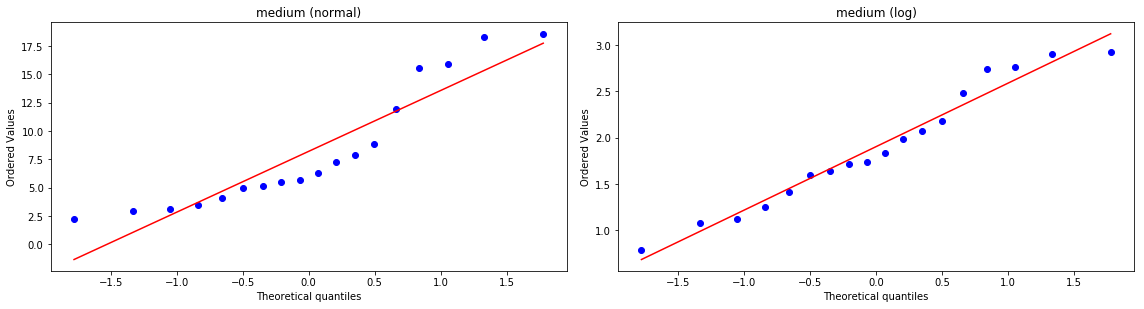

In [17]:
plt.subplot(2,2,1)
st.probplot(iron['medium'], plot=plt)
plt.title('medium (normal)')
plt.subplot(2,2,2)
st.probplot(iron_log['medium'], plot=plt)
plt.title('medium (log)')
plt.tight_layout()
plt.show()

Die Normalverteilung passt bei den transformierten Daten besser.

**d) Unter der Annahme, dass die Daten bei mittlerer Dosis normalverteilt sind,
schätzen Sie die Parameter $μ$ und $\sigma^2$. Wie gross ist die Wahrscheinlichkeit, dass eine Maus mehr als 10% Eisen zurückhält.**

$X \sim \mathcal{N}(\mu,\,\sigma^{2})$

Der Erwartungswert entspricht dem Durchschnitt, also: $\hat{\mu} = \bar{x}$

In [30]:
mean = iron.medium.mean()
print(mean)

8.20388888888889


In [31]:
std = iron['medium'].std()

In [34]:
# P(x > 10) = 1 - P(x < 10)
1 - st.norm.cdf(x=10, loc=mean, scale=std)

0.37080583780045595

**e) (_Zusatzaufgabe_) Unter der Annahme, dass die Daten bei mittlerer Dosis log-normalverteilt sind, schätzen Sie die Parameter $μ$ und $\sigma^2$. Wie gross ist die Wahrscheinlichkeit,
dass eine Maus mehr als 10% Eisen zurückhält.**

_Hinweis: Ist $Y = log(X)$ normalverteilt ist, so heisst $X$ log-normalverteilt._

In [36]:
iron_log = np.log(iron['medium'])
mean = iron_log.mean()
std = iron_log.std()
print('X~log N({:.3f}, {:.3f}^2)'.format(mean, std))


p = 1 - st.norm.cdf(np.log(10), loc=mean, scale=std)
print('P(X>10%)={:.4f}'.format(p))

X~log N(1.901, 0.659^2)
P(X>10%)=0.2711


# Aufgabe 5.4

Ein Statistiker beobachtet, dass ein Angler innerhalb von 2 Stunden 15 Fische fängt.
Er nimmt an, dass es sich um einen Poissonprozess handelt und überlegt sich:

**a) Mit welcher Wahrscheinlichkeit dauert es länger als 12 Minuten, bis der nächste Fisch anbeisst?**

_Hinweis: Benützen Sie die Momentenmethode, um Parameter zu schätzen._

Der geschätzte Erwartungswert enstpricht dem arithmetischen Mittel:
    
Wartezeit: $T \approx e^\lambda$ 


$$ \widehat{E(T)}=\overline{x} = \frac{1}{\lambda} = \frac{120}{15} = 8 $$

$$ \lambda = \frac{1}{8}$$

$$P(T > 12) = 1 - P(T < 12) $$

In [151]:
import scipy.stats as st
1 - st.expon.cdf(12, scale = 8)

0.2231301601484298

**b) Mit welcher Wahrscheinlichkeit beissen innerhalb der nächsten 12 Minuten genau 2 Fische an?**

In 12 Minuten sind 1.5 Fische zu erwarten:

$$ \frac{1}{8} = \frac{\lambda}{12} \Leftrightarrow \lambda = \frac{12}{8} = 1.5 $$

Wahrscheinlichkeitsdichtefunktion der Poisson-Verteilung:

$$ P(X=x) = e^{-\lambda} \frac{\lambda^x}{x!} $$

Mit $\lambda = 1.5$ und $x = 2$:

$$P(X=2) = e^{-1.5} \frac{1.5^2}{2!} = 0.251 $$

**c) Ein Fischer hat die Wartezeiten zwischen zwei Fischfängen aufgeschrieben. Erstellen
Sie einen QQ-Plot für die angegebenen Zeitdifferenzen. Tragen Sie dazu
die empirischen Quantile der Messungen gegen die theoretischen Quantile der Exp(1)-Verteilung auf. Passt die Exponentialverteilung zu den Messdaten? Bestimmen
Sie die Steigung der Regressionsgeraden im QQ-Plot. Was ist die Bedeutung
von der Steigung der Regressionsgeraden in diesem QQ-Plot? Schätzen
Sie aufgrund der Steigung den Parameter $\lambda$ der Exp($\lambda$)-Verteilung.**

<img src="./img/fish.png" alt="fish table" width="200"/>

Kumulative Verteilfunktion:

$$ F(x) = 1 - e^{-\lambda x}$$

Die Umkehrfunktion entspricht den (theoretischen) Quantilen:

$$ F(q_{\alpha}) = \alpha \Leftrightarrow q_{\alpha} = F^{-1}(\alpha) $$

Auflösen nach $q_\alpha$:

$$ \alpha = 1 - e^{-\lambda q_{\alpha}} \quad \big| + e^{-\lambda q_{\alpha}} \quad -\alpha $$

$$ e^{-\lambda q_{\alpha}} = 1 - \alpha \quad \big| log $$

$$ -\lambda q_{\alpha} log(e) = log(1-\alpha) \quad \big| log(e)=1 $$

$$ -\lambda q_{\alpha} = log(1-\alpha) \quad \big| : -\lambda $$

$$ \underline{q_{\alpha} = \frac{1}{-\lambda} log(1-\alpha)} $$

Die empirischen $ \alpha_k $-Quantile werden folgendermassen berechnet:

$$ \alpha_k = \frac{k-0.5}{n} $$

In [50]:
fish = pd.Series([16.9,4.2,6.7,8.83,10.7,22.4,1.37,3,4.82,4.53,6.77,4.81])
fish.describe()

count    12.000000
mean      7.919167
std       6.130399
min       1.370000
25%       4.447500
50%       5.760000
75%       9.297500
max      22.400000
dtype: float64

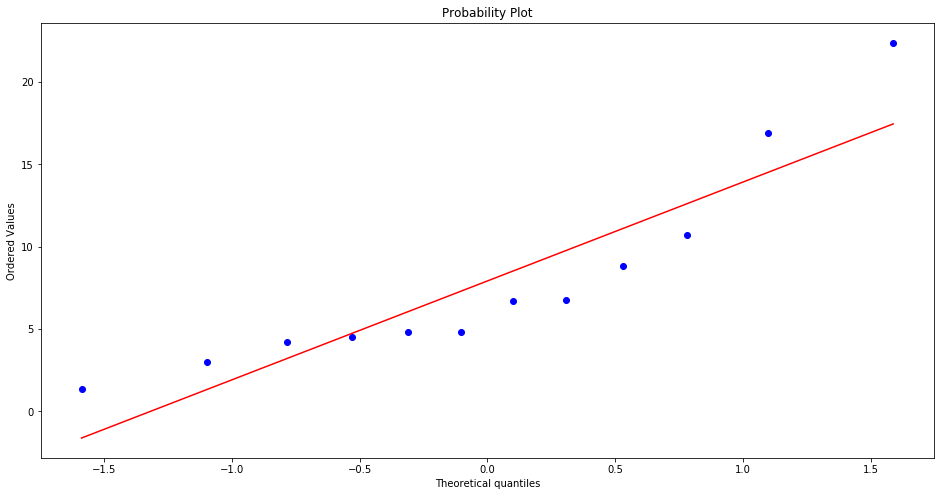

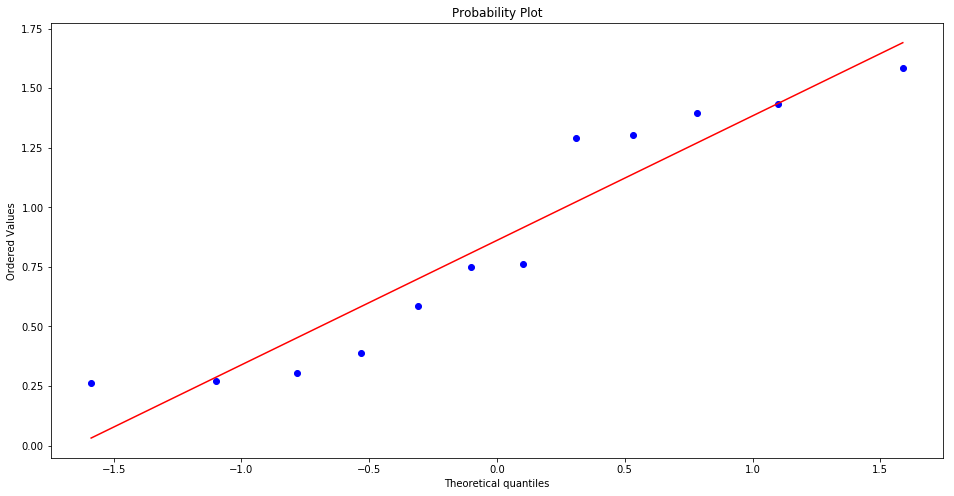

In [51]:
st.probplot(fish, plot = plt)
plt.show()
st.probplot(st.expon.rvs(size=fish.size), plot=plt)
plt.show()

In [52]:
fish.mean()

7.919166666666666

In [53]:
# TODO: Steigung der Geraden schätzen

# Aufgabe 5.5

Für grossangelegte Simulationen müssen im allgemeinen pseudozufällige Zahlen generiert werden; diese Zahlen heissen pseudozufällig, da sie mit Hilfe eines Algorithmus erzeugt werden und daher nicht "‘wirklich"’ zufällig sind. Angenommen wir möchten die Performance von Warteschlangennetzwerken beurteilen mit Hilfe einer Simulation, dann müssen wir zufällige Zeitintervalle zwischen den Ankünften von Kunden generieren. Wir nehmen an, diese Zeitintervalle folgen einer Exponentialverteilung.

Verfügen wir über keinen Zufallsgenerator für exponentialverteilte
Zufallszahlen, dann können wir exponentialverteilte Zufallszahlen mit Hilfe von gleichmässig
im Intervall $[0, 1]$ verteilten Zufallszahlen erzeugen, und zwar mit folgender Überlegung: Sei $U$ eine uniform auf dem Intervall $[0, 1]$ verteilte Zufallsvariable, und sei $X = F^{−1}_X (U)$, wobei $F_X(x) = 1 − e^{−\lambda x}$ die kumulative Verteilungsfunktion der Exponentialverteilung ist. Dann gilt

$$ P(X \leq x)=P\left(F_{X}^{-1}(U) \leq x\right)=P\left(U \leq F_{X}(x)\right)=F_{U}\left(F_{X}(x)\right)=F_{X}(x) $$

wobei wir im letzten Schritt benutzt haben, dass die kumulative Verteilungsfunktion der uniformen Verteilung gegeben ist durch $F_U(u) = \frac{u−0}{1−0} = u$, falls $u \in [0, 1]$. Die
Zufallsvariable, die durch $X = F^{−1}_X(U)$ definiert wurde, folgt also einer Exponentialverteilung.

**a) Lösen Sie $F_X(x) = 1 − e^{−\lambda x} = u$ nach $x$ auf, d. h., bestimmen Sie die Funktion $F^{−1}_X (U)$. Generieren Sie nun $n = 1000$ Zufallszahlen $X_i \sim Exp(\lambda = 2) (i =
1, . . . , n)$ mit $F^{−1}_X (U)$, wobei $U$ uniform auf $[0, 1]$ verteilt ist.**

Auflösen nach $x$ ($F^{-1}$ bestimmen):

$$ F^{-1}(U) = \frac{1}{-\lambda}log(1 - u) = x$$

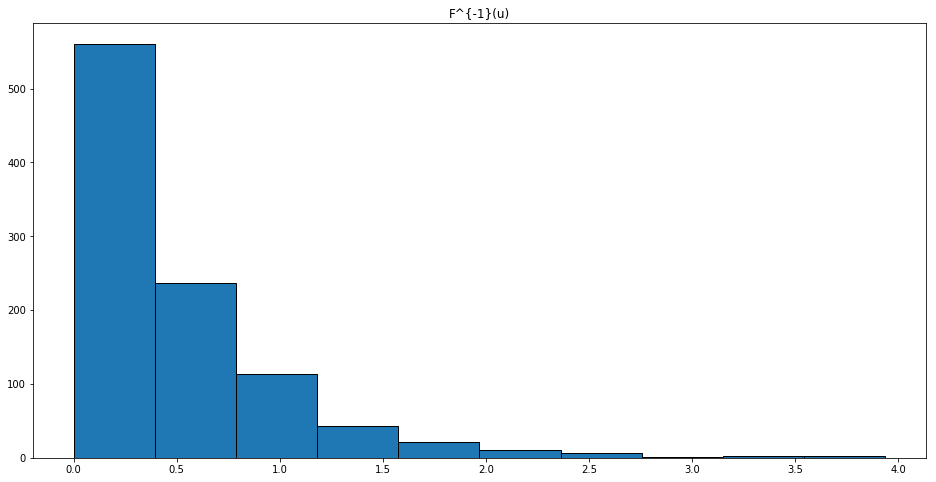

In [63]:
import numpy as np
from scipy.stats import uniform

# 1000 uniform verteilte Zufallszahlen:
n = 1000
u = st.uniform.rvs(size=n, loc=0, scale=1)

# x = F^(-1)(u)
lam = 2 # siehe Aufgabenstellung
x = 1 / -lam * np.log(1-u)

plt.hist(x, edgecolor="black")
plt.title("F^{-1}(u)")
plt.show()


**b) Vergleichen Sie das Histogramm der in Aufgabe a) generierten 1000 exponentialverteilten Zufallszahlen mit dem Histogramm der mit Hilfe des Python-Befehls `expon.rvs()` erzeugten Zufallszahlen.**

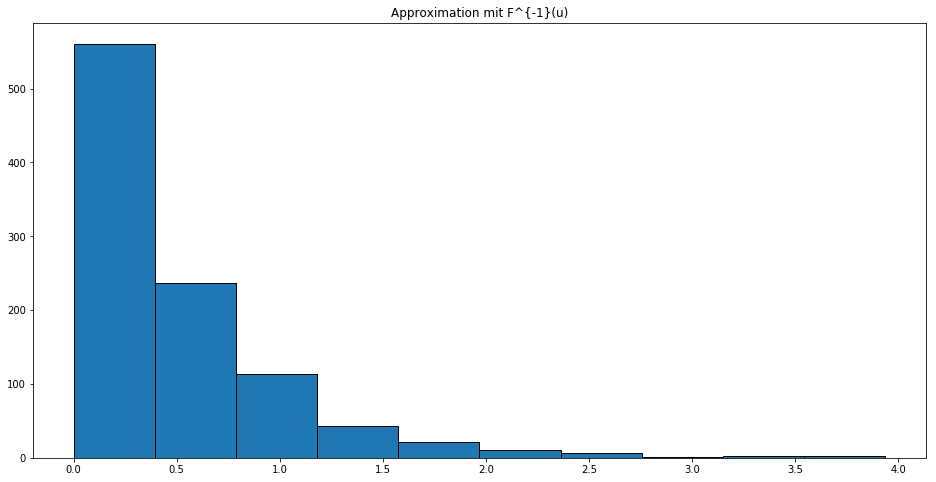

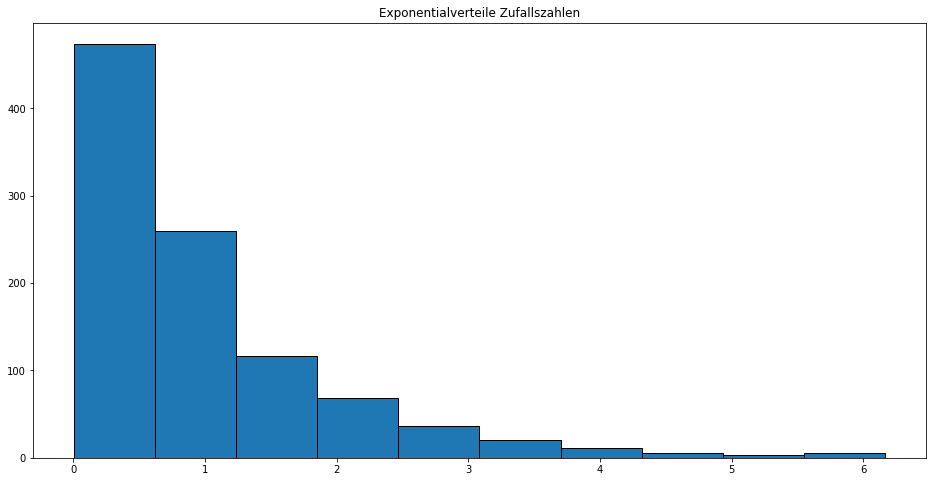

In [79]:
from scipy.stats import expon

e = expon.rvs(0, 1, n)

plt.hist(x, edgecolor="black")
plt.title("Approximation mit F^{-1}(u)")
plt.show()

plt.hist(e, edgecolor="black")
plt.title("Exponentialverteile Zufallszahlen")
plt.show()

**c) Erstellen Sie einen QQ-Plot, um zu überprüfen, dass die 1000 generierten Zahlen exponentialverteilt sind.**

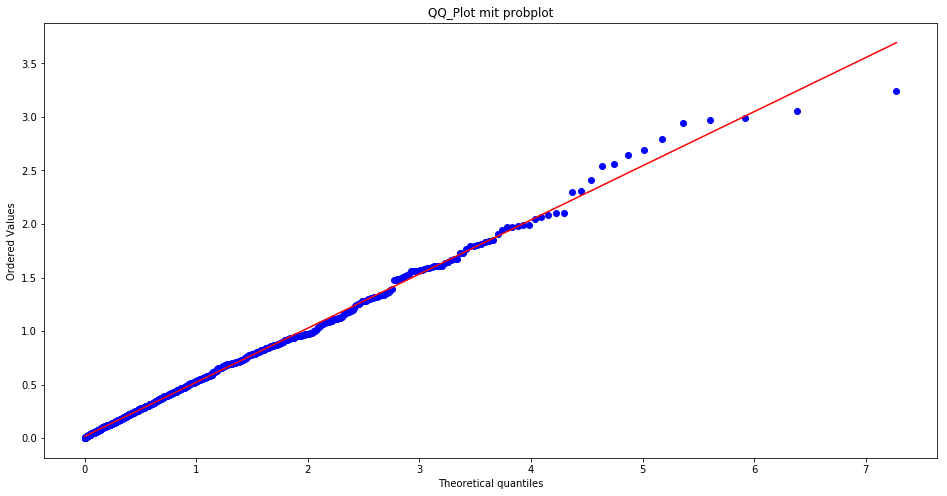

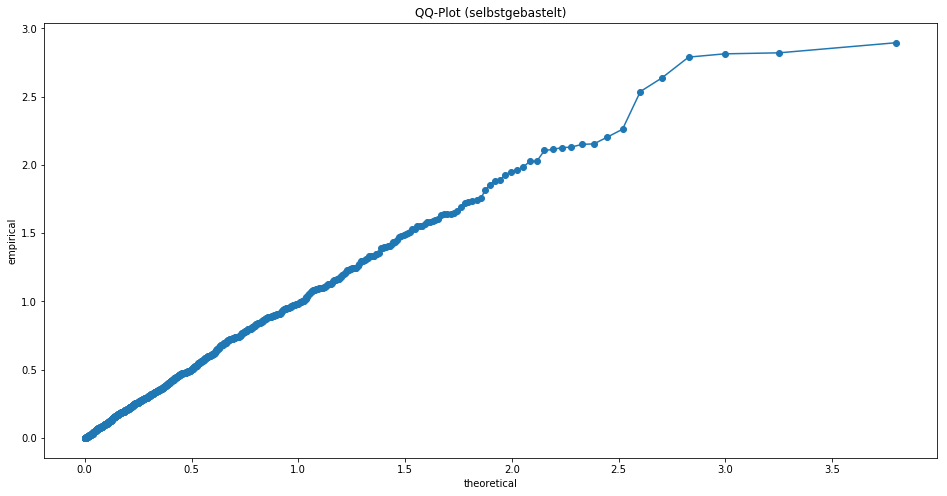

In [92]:
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import pandas as pd
from scipy.stats import uniform, expon

# Mit probplot
st.probplot(x, dist="expon", plot=plt)
plt.title("QQ_Plot mit probplot")
plt.show()

# Von Hand
n = 1000
u = uniform.rvs(size=n, loc=0, scale=1)
x = x = -np.log(u) / 2

q_theoretical = expon.ppf((np.linspace(1,n,n) - 0.5)/n, scale=0.5)
q_empirical = np.sort(x)

plt.plot(q_theoretical, q_empirical, marker='o')
plt.xlabel('theoretical')
plt.ylabel('empirical')
plt.title('QQ-Plot (selbstgebastelt)')
plt.show()

# Aufgabe 5.6

In dieser Aufgabe geht es um Parameterschätzung. Wir betrachten eine stetige Verteilung
mit folgender Dichte:

$$
f(x)=\left\{\begin{array}{ll}{\frac{\alpha}{x^{\alpha+1}}} & {x \geq 1} \\ {0} & {x<1}\end{array}\right.
$$

wobei $α$ > 0 ein unbekannter Parameter ist. Wir wollen den Parameter $α$ aus einer Stichprobe schätzen.

**a) Bestimmen Sie die Likelihood- und die Log-Likelihood-Funktion basierend auf $n$ unabhängigen identisch verteilten Beobachtungen $x_1, ... , x_n$ einer Zufallsvariablen mit obiger Dichte.**

* $n$ Beobachtungen, $x_1,x_2,\dots,x_n$
* $l$: Likelihood-Funktion
* $log(l)$: log-Likelihood-Funktion

Likelihood-Funktion:

$$ l(\alpha; x_1,\dots,x_n) = \alpha\frac{1}{x_1^{\alpha+1}} \cdot \alpha\frac{1}{x_2^{\alpha+1}} \cdots \alpha\frac{1}{x_n^{\alpha+1}} = \alpha^n\frac{1}{(\prod^n_{i=1} x_i)^{\alpha+1}} $$

Log-Likelihood-Funktion:

$$ log(l)(\alpha, x_1, \dots, x_n) = n \cdot log(\alpha) - (\alpha + 1) \sum_{i=1}^n log(x_i) $$

**b) Bestimmen Sie den zugehörigen Maximum-Likelihood-Schätzer für $α$. Schreiben Sie zuerst die allgemeine Formel für $n$ Beobachtungen hin und berechnen Sie den Schätzer dann für die folgende konkrete Stichprobe:**

<img src="./img/fogu.png" width=250/>

In [29]:
stichprobe = [12.0, 4.0, 6.9, 27.9, 15.4]

$log(l)$ ableiten und $=0$ setzen:

$$ \hat{\alpha}_{MLE} = \frac{n}{\sum_{i=1}^n log(x_i)} = \frac{5}{log(12.0)+log(4.0)+log(6.9)+log(27.9)+log(15.4)} \approx 0.4 $$

**c) Bestimmen Sie den Momentenschätzer für $α$, wieder zuerst allgemein basierend auf $n$ unabhängigen Beobachtungen $x_1, ... , x_n$ und dann für obige Stichprobe.**

_Hinweise: Der Erwartungswert einer Zufallsvariablen $X$ mit obiger Dichte $f$ ist_

$$
f(x)=\left\{\begin{array}{ll}{0} & {x \leq 0} \\ {\frac{1}{x \sqrt{2 \pi} \sigma} \mathrm{e}^{-\frac{(\log (x)-1)^{2}}{2 \sigma^{2}}}} & {x>0}\end{array}\right.
$$


_Für $α ≤ 1$ ist der Erwartungswert gleich $∞$ und der Momentenschätzer ist nicht definiert. Sie müssen für diese Teilaufgabe also annehmen, dass $α > 1$._

Erwartungswert:

$$ E[X] = \frac{\alpha}{\alpha-1}, \alpha > 1 $$

Mit Stichprobenmittel gleichsetzen:

$$ E[X] = \frac{1}{n}\sum_{i=1}^n x$$

$$ \hat{\alpha}_{MoM} = \frac{\overline{x}}{\overline{x}-1} = \frac{13.24}{13.24-1}  \approx 1.01 $$


**d) Vergleichen Sie den Maximum-Likelihood und den Momentenschätzer für obige Stichprobe. Ist der Momentenschätzer hier sinnvoll?**

Mit der Maximum-Likelihood Methode bekommt man ein $\hat{\alpha}$ deutlich kleiner als 1. Der Momentenschätzer ist aber nur für $\alpha > 1$ definiert und ist darum in diesem Fall nicht sehr sinnvoll.

# Aufgabe 5.7

Die Inkubationszeit eines Virus ist definiert als die Zeitspanne (gemessen in Tagen) von der Ansteckung bis zum Ausbruch der Krankheit. Diese Inkubationszeit wird mit folgender Dichte beschrieben:

$$
f(x)=\left\{\begin{array}{ll}{0} & {x \leq 0} \\ {\frac{1}{x \sqrt{2 \pi} \sigma} \mathrm{e}^{-\frac{(\log (x)-1)^{2}}{2 \sigma^{2}}}} & {x>0}\end{array}\right.
$$



wobei wir mit $log(·)$ den natürlichen Logarithmus bezeichnen. Hier ist $s > 0$ der unbekannte Parameter, welchen es zu schätzen gilt. Wir möchten nun den Parameter der Verteilung kennen, dazu nehmen wir eine Stichprobe. Das Ziel ist, diesen unbekannten Parameter daraus zu schätzen, um somit zum Beispiel die Dauer von Quarantänemassnahmen für ein neuartiges Virus abschätzen zu können. Wir betrachten die Daten (in Tagen):

<img src="./img/57_table.png"  width=250 />

*Hinweis*: Für eine Zufallsvariable X mit obiger Dichte gilt

$$ E[X] = e^{1+\sigma^2/2} $$

**a) Bestimmen Sie die Likelihood- und die log-Likelihood-Funktion basierend auf $n$ unabhängigen identisch verteilten Beobachtungen $x_1, ... , x_n$ einer Zufallsvariable mit
obiger Dichte. Berechnen Sie daraus den Maximum-Likelihood Schätzer
für den unbekannten Parameter $s$. Die konkreten Werte brauchen Sie nicht
einzusetzen.**

Likelihood-Funktion:

$$ l(\sigma; x_1, \dots, x_n) = \frac{1}{\prod_{i=1}^n x_i (2\pi\sigma^2)^{\frac{n}{2}}} \cdot exp \Big(-\sum_{i=1}^n \frac{(log(x_i)-1)^2}{2\sigma^2}\Big) $$

Log-Likelihood-Funktion:

$$ log(l)(\sigma; x_1, \dots, x_n) = log(1) - \sum_{i=1}^n log(x_i) - \frac{n}{2}log(2\pi) -n\cdot log(\sigma) - \sum_{i=1}^n \frac{(log(x_i)-1)^2}{2\sigma^2} $$

ableiten, gleich null setzen:

$$ \frac{\mathcal{df}}{\mathcal{d\sigma}} \Big|_{\hat{\sigma}} = -\frac{n}{\hat{\sigma}} + \frac{1}{\hat{\sigma}^3} \sum_{i=1}^n (log(x_i)-1)^2 = 0 $$

nach $\hat{\sigma}$ auflösen:

$$ \frac{n}{\hat{\sigma}} = \frac{\sum_{i=1}^n (log(x_i)-1)^2}{\hat{\sigma}^3} \Leftrightarrow \hat{\sigma} = \sqrt{\frac{\sum_{i=1}^n (log(x_i)-1)^2}{n}} $$

$$ \hat{\sigma}_{MLE} = \sqrt{\frac{(log(1.62)-1)^2 + (log(5.29)-1)^2 + (log(3.93)-1)^2 + (log(1.49)-1)^2 + (log(1.57)-1)^2}{5}} \approx 0.550 $$


**b) Bestimmen Sie den Momentenschätzer für $s$, sowohl basierend auf $n$ unabhängigen
Beobachtungen $x_1,... , x_n$, wie auch den realisierten Wert für die gegebene
Stichprobe.**

Gegeben durch Aufgabenstellung:

$$E[X]=\mathcal{e}^{1+\frac{\sigma^2}{2}}$$

Definition Erwartungswert:

$$E[X]=\frac{1}{n}\sum_{i=1}^n x_i$$

Durch Gleichsetzen und Auflösen nach $\sigma$ erhält man den Momentenschätzer:

$$ \mathcal{e}^{1+\frac{\sigma^2}{2}}=\frac{1}{n}\sum_{i=1}^n x_i \quad \big| \quad \mathcal{log} $$

$$ 1+\frac{\sigma^2}{2} = log\Big(\frac{1}{n}\sum_{i=1}^n x_i\Big) \quad \big| \quad -1 $$

$$ \frac{\sigma^2}{2} = log\Big(\frac{1}{n}\sum_{i=1}^n x_i\Big) - 1 \quad \big| \quad \cdot 2 $$

$$ \sigma^2 = 2 \cdot log\Big(\frac{1}{n}\sum_{i=1}^n x_i\Big) - 2 \quad \big| \quad \sqrt{} $$

$$ \sigma = \sqrt{2 \cdot log\Big(\frac{1}{n}\sum_{i=1}^n x_i\Big) - 2} $$

$$ \hat{\sigma}_{MoM} = \sqrt{2 \cdot log\Big( \frac{1.62+5.29+3.93+1.49+1.57}{5} -2 \Big)} \approx 0.212 $$

**c) Nehmen wir für diese Teilaufgabe an, dass wir folgende Daten beobachtet haben:**

```
| x1  | x2   | x3   |
|-----|------|------|
|2.12 | 1.63 | 4.21 |
```

**Welcher Schätzer (Momentenschätzer oder Maximum-Likelihood Schätzer) ist bei diesen Daten zu bevorzugen? Begründen Sie.**


In [94]:
# ???